## **演示0702：线性回归的其它计算方法**

### **案例1：基于协方差-方差公式的实现**
>可以参考【实验0502_最小二乘法】中的协方差-方差公式部分  
* 系数计算公式：  
$ \theta_1= \dfrac{\sum_i^m (\bar x - x^{(i)})(\bar y - y^{(i)})}{\sum_i^m (\bar x - x^{(i)})^2}=\dfrac{cov(x, y)}{var(x)} $  
$ \theta_0=\bar y - \theta_1 \bar x $
 * $\bar y$：训练数据中$y$的平均值
 * $\bar x$：训练数据中$x$的平均值
 * $cov(x, y)$：向量$x$和$y$的协方差
 * $var(x)$：向量$x$的方差
* 使用该方法计算出来的判别函数参数，与LinearRegression对象的计算结果一致。

In [1]:
''' 使用协方差-方差公式计算线性回归权重参数，并与LinearRegression结果对比 '''

import numpy as np
from sklearn.linear_model import LinearRegression

xTrain = np.array([6,8,10,14,18])[:,np.newaxis]
yTrain = np.array([7,9,13,17.5,18])

model = LinearRegression() 
hypothesis = model.fit(xTrain, yTrain)
print("LinearRegression theta1=", hypothesis.coef_)
print("LinearRegression theta0=", hypothesis.intercept_)

# cov函数是在各行元素之间计算协方差，所以x和y都应是行向量
theta1 =  np.cov(xTrain.T, yTrain, ddof=1)[1,0] / np.var(xTrain, ddof=1)
theta0 = np.mean(yTrain) - theta1 * np.mean(xTrain)
print("Least Square theta1=", theta1)                   # 通过最小二乘法公式计算的斜率
print("Least Square theta0=", theta0)                   # 通过最小二乘法公式计算的截距

LinearRegression theta1= [0.9762931]
LinearRegression theta0= 1.965517241379315
Least Square theta1= 0.976293103448276
Least Square theta0= 1.9655172413793096


### **案例2：基于成本函数和批量梯度下降算法的实现**
>  
* 成本函数：
 * 在使用训练数据来训练模型时，用于定义判别函数与实际值的误差。成本函数计算结果越小，说明该模型与训练数据的匹配程度越高
 * 设定了某个模型后，只要给定了成本函数，就可以使用数值方法求出成本函数的最优解（极小值），从而确定判别函数模型中各个系数
 * 一元线性回归(直线拟合)的成本函数：  
  $ J(\theta)=\dfrac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 = \dfrac{1}{2m} \sum_{i=1}^m(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2 $  
   * $ m $：训练数据集中的数据组数。
   * $ h_\theta $：训练出来的判别函数
   * $ x^{(i)} $：训练数据集中的第$ i $组数据的$ x $值（直径）
   * $ y^{(i)} $：训练数据集中第$i$组数据的$y$值（实际价格）
   * $ h_\theta(x^{(i)}) $：将$x^{(i)}$代入到判别函数计算的结果，也就是根据判别函数算出的$y$值（预测价格）
* 梯度计算：  
$ \begin{aligned}
\dfrac{\partial J(\theta)}{\partial \theta_0}=&
\dfrac{\partial [\dfrac{1}{2m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2]}{\partial \theta_0} \\ \\
= & \dfrac{\dfrac{1}{2m} * 2 * \sum_{i=1}^m [(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) * \partial {(\theta_0 + \theta_1 x^{(i)} - y^{(i)})}]}{\partial \theta_0} \\ \\
= & \dfrac{1}{m} \sum_{i=1}^m [(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) * (1+0+0)] \\ \\
= & \dfrac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})
\end{aligned} $  
$ \begin{aligned}  
\dfrac{\partial J(\theta)}{\partial \theta_1}=&
\dfrac{\partial [\dfrac{1}{2m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2]}{\partial \theta_1} \\ \\
= & \dfrac{\dfrac{1}{2m} * 2 * \sum_{i=1}^m [(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) * \partial {(\theta_0 + \theta_1 x^{(i)} - y^{(i)})}]}{\partial \theta_1} \\ \\
= & \dfrac{1}{m} \sum_{i=1}^m [(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) * (0+x^{(i)}+0)] \\ \\
= & \dfrac{1}{m} \sum_{i=1}^m [(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) * x^{(i)}]
\end{aligned} $
* 权重参数更新  
$ \theta_0'=\theta_0 - \alpha \dfrac{\partial J(\theta)}{\partial \theta_0} $  
$ \theta_1'=\theta_1 - \alpha \dfrac{\partial J(\theta)}{\partial \theta_1} $  
* 请参考bgd_resolver.py文件中的批量梯度下降算法函数实现

循环 11321 次后收敛
BGD theta1= 0.9763016738954665
BGD theta0= 1.9654071479500155


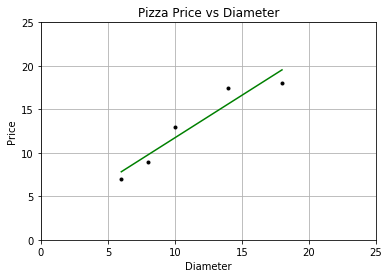

In [2]:
''' 使用批量梯度下降算法优化线性回归权重参数 '''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import bgd_resolver    # 来自bgd_resolver.py文件

def costFn(theta, X, y):                                # 定义线性回归的成本函数
    temp = X.dot(theta) - y
    return temp.dot(temp) / (2*len(X))

def gradientFn(theta, X, y):                            # 根据成本函数，分别对x0和x1求导数(梯度)
    return (X.T).dot(X.dot(theta) - y) / len(X)  

xTrain = np.array([6,8,10,14,18])[:,np.newaxis]
yTrain = np.array([7,9,13,17.5,18])
xTrain_ext = np.c_[np.ones(len(xTrain)), xTrain]        # 第一列补充0。注意返回的第一个权重参数将对应theta0

np.random.seed(0)
theta_init = np.random.randn(xTrain_ext.shape[1])
theta = bgd_resolver.batch_gradient_descent(costFn, gradientFn, theta_init, xTrain_ext, yTrain, learning_rate=0.005, tolerance=1e-12)  
print("BGD theta1=", theta[1])
print("BGD theta0=", theta[0])

def initPlot():
    plt.figure()
    plt.title('Pizza Price vs Diameter')
    plt.xlabel('Diameter')
    plt.ylabel('Price')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = initPlot()
plt.plot(xTrain, yTrain, 'k.')
plt.plot(xTrain, xTrain_ext.dot(theta), 'g-')
plt.show()

### **案例3：基于SGDRegressor随机梯度下降算法的实现**
> sklearn.linear_model.SGDRegressor对象提供了使用随机梯度下降算法进行线性回归的实现
* 但是SGDRegressor对于数据集较大的情形比较合适，如果样本较少(例如本例)，其效果一般不好
* 可以观察到，每次运行时，其优化结果并不相同

SGD theta1= 0.9909625948658856
SGD theta0= 1.7038394839981144


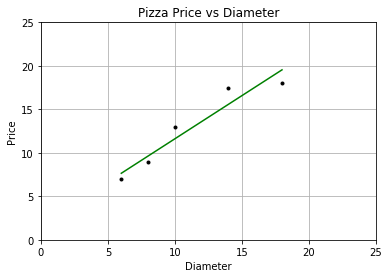

In [3]:
''' 使用SGDRegressor随机梯度下降算法优化线性回归权重参数 '''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

xTrain = np.array([6,8,10,14,18])[:, np.newaxis]
yTrain = np.array([7,9,13,17.5,18])

regressor = SGDRegressor(loss='squared_loss', max_iter=2000) 
regressor.fit(xTrain, yTrain)
# 每次运行，得到的结果并不相同
theta0 = regressor.intercept_[0]
theta1 = regressor.coef_[0]
print("SGD theta1=", theta1)
print("SGD theta0=", theta0)

def initPlot():
    plt.figure()
    plt.title('Pizza Price vs Diameter')
    plt.xlabel('Diameter')
    plt.ylabel('Price')
    plt.axis([0, 25, 0, 25])       
    plt.grid(True)
    return plt

plt = initPlot()
plt.plot(xTrain, yTrain, 'k.')
plt.plot(xTrain, theta0 + theta1 * xTrain, 'g-')               
plt.show()